In [1]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\RJANSEN\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\RJANSEN\\.matplotlib'

# ARIMA

In [3]:
# Import additional libs
import warnings
import itertools
import statsmodels.api as sm

### Load Data

In [4]:
# Load the data
df = pd.read_csv('avocado.csv')
cols = df.columns

#### Select Timeseries

In [5]:
region = 'TotalUS'
Type = 'conventional'

In [27]:
df_sub = df.loc[ (df.region == region) & (df.type == Type)]

# keep only price and dates
keepcols = ['Date', 'AveragePrice']
ts = df_sub[keepcols]

In [28]:
ts

,Date,AveragePrice
2652,2015-12-27,0.95
2653,2015-12-20,0.98
2654,2015-12-13,0.93
2655,2015-12-06,0.89
2656,2015-11-29,0.99
...,...,...
9097,2018-02-04,0.87
9098,2018-01-28,1.09
9099,2018-01-21,1.08
9100,2018-01-14,1.20


In [29]:
print(min(ts.Date))
print(max(ts.Date))
print(min(ts.AveragePrice))
print(max(ts.AveragePrice))

2015-01-04
2018-03-25
0.76
1.65


In [30]:
# sort dates and then convert date to index
ts = ts.sort_values('Date')

ts['Date']=pd.to_datetime(ts['Date'], format='%Y-%m-%d')
ts.set_index(['Date'], inplace=True)

In [31]:
ts = ts.resample('2W').mean()

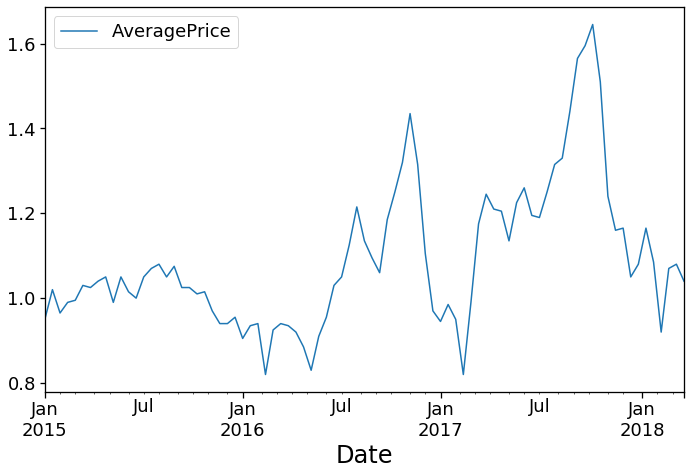

In [32]:
ts.plot()

In [33]:
train_data = ts['2015-01-03':'2017-12-01']
test_data = ts['2017-12-01':'2018-03-25']

In [34]:
train_data

,AveragePrice
Date,
2015-01-04,0.950
2015-01-18,1.020
2015-02-01,0.965
2015-02-15,0.990
2015-03-01,0.995
...,...
2017-09-24,1.595
2017-10-08,1.645
2017-10-22,1.510


In [37]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonality_period = 24
seasonal_pdq = [(x[0], x[1], x[2], seasonality_period) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic)) #, end='\r')  # print same line
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 24) - AIC:230.46691816390987
SARIMAX(0, 0, 0)x(0, 0, 1, 24) - AIC:2211.0503527768537
SARIMAX(0, 0, 0)x(0, 1, 0, 24) - AIC:-18.65296103320387
SARIMAX(0, 0, 0)x(1, 0, 0, 24) - AIC:-33.183377507420964
SARIMAX(0, 0, 0)x(1, 0, 1, 24) - AIC:-31.044352696708437
SARIMAX(0, 0, 0)x(1, 1, 0, 24) - AIC:0.937529414338599
SARIMAX(0, 0, 0)x(2, 0, 0, 24) - AIC:-25.953546648133088
SARIMAX(0, 0, 0)x(2, 0, 1, 24) - AIC:-23.973828422827808
SARIMAX(0, 0, 0)x(2, 1, 0, 24) - AIC:-6.520394045306686
SARIMAX(0, 0, 0)x(3, 0, 0, 24) - AIC:-12.008805474333457
SARIMAX(0, 0, 0)x(3, 0, 1, 24) - AIC:-10.008804715775476
SARIMAX(0, 0, 1)x(0, 0, 0, 24) - AIC:133.28452946720114
SARIMAX(0, 0, 1)x(0, 0, 1, 24) - AIC:3483.241569026119
SARIMAX(0, 0, 1)x(0, 1, 0, 24) - AIC:-66.39664293123917
SARIMAX(0, 0, 1)x(1, 0, 0, 24) - AIC:-79.6597827949386
SARIMAX(0, 0, 1)x(1, 0, 1, 24) - AIC:-76.03050714322185
SARIMAX(0, 0, 1)x(1, 1, 0, 24) - AIC:-25.81930018130833
SARIMAX(0, 0, 1)x(2, 0, 0, 24) - AIC:-45.9026

In [16]:
# print best result
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is -18.754742614131374 for model SARIMAX(0, 1, 0)x(0, 0, 0, 12)


In [24]:
train_data

,AveragePrice
Date,
2016-01-31,0.9220
2016-02-29,0.8725
2016-03-31,0.9375
2016-04-30,0.9025
2016-05-31,0.8840
2016-06-30,1.0175
2016-07-31,1.1480
2016-08-31,1.1150
2016-09-30,1.1225


In [17]:
# fit model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

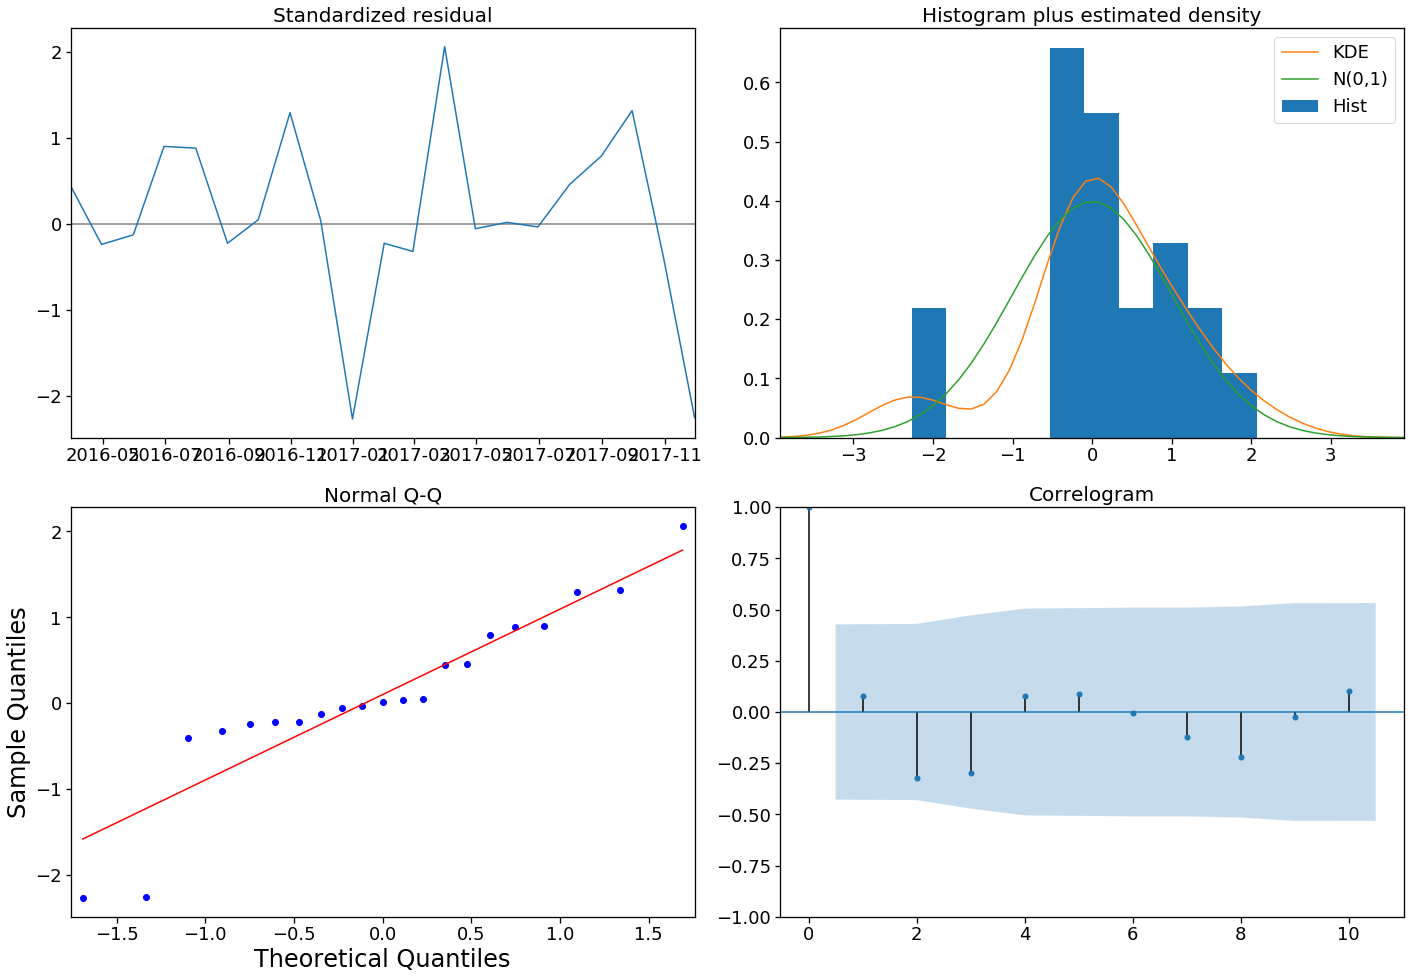

In [18]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [25]:
pred0 = results.get_prediction(start='2017-01-31', dynamic=False)
pred0_ci = pred0.conf_int()

In [23]:
pred1 = results.get_prediction(start='2017-11-19', dynamic=True)
pred1_ci = pred1.conf_int()
print(pred1.predicted_mean) 

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
pred2 = results.get_forecast(52)
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2018-01-14':'2018-03-25']) 

In [ ]:
plt.plot(train_data.index, train_data.values, 'k:')
plt.plot(pred0.predicted_mean.index, pred0.predicted_mean.values, label='1-step-ahead Forecast' )
plt.plot(pred1.predicted_mean.index, pred1.predicted_mean.values, label='Dynamic Forecast (testdata)')
plt.plot(pred2.predicted_mean.index, pred2.predicted_mean.values, label='Dynamic Forecast')
plt.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Avocado price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
prediction = pred2.predicted_mean['1960-01-01':'1960-12-01'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 1960 is {:.2f}%'.format(MAPE))